# Data Cleaning

In [22]:
#importing necessary packages

import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv('data/basketball_data.csv')

In [24]:
data.head()

,Unnamed: 0,player_name,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL,team,conf,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,0,Cade Cunningham,Detroit Pistons,Oklahoma State,2021.0,1,1,1,Oklahoma St.,B12,...,2.53637,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,Wing F,8.87260
1,1,Evan Mobley,Cleveland Cavaliers,Southern California,2021.0,1,3,3,USC,P12,...,5.25248,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,C,2.10197
2,2,Scottie Barnes,Toronto Raptors,Florida State,2021.0,1,4,4,Florida St.,ACC,...,2.99510,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,Scoring PG,3.85045
3,3,Jalen Suggs,Orlando Magic,Gonzaga,2021.0,1,5,5,Gonzaga,WCC,...,4.11123,0.6000,4.7333,5.3333,4.5333,1.9000,0.3333,14.3000,Combo G,6.42283
4,4,Franz Wagner,Orlando Magic,Michigan,2021.0,1,8,8,Michigan,B10,...,3.05480,0.8889,4.7037,5.5926,1.0000,1.2593,0.5926,11.5556,Wing F,9.22711


In [25]:
#dropping unnecessary columns

data.drop(columns=['ht', 'type', 'TEAM', 'team', 'YEAR', 'player_name', 'Unnamed: 0', 'Unnamed: 65', 'num', 'rimmade', 'rimmade+rimmiss', 'midmade', 
'midmade+midmiss', 'dunksmade', 'dunksmiss+dunksmade', 'pick', 'pfr', 'pid', 'gbpm', 'ogbpm', 'dgbpm', 'year'], inplace=True)

In [26]:
#renaming column
data.rename(columns={'Unnamed: 64': 'Position'}, inplace=True)

In [27]:
#created our target class (whether an observation has ROUND 1 value or ROUND 2 value)
data['Class'] = data.ROUND.apply(lambda x: 1 if x == 1 else 0)

In [28]:
#dropped more unneccessary columns
data.drop(columns=['ROUND', 'ROUND.1', 'OVERALL'], inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AFFILIATION                      1487 non-null   object 
 1   conf                             1487 non-null   object 
 2   GP                               1487 non-null   int64  
 3   Min_per                          1487 non-null   float64
 4   Ortg                             1487 non-null   float64
 5   usg                              1487 non-null   float64
 6   eFG                              1487 non-null   float64
 7   TS_per                           1487 non-null   float64
 8   ORB_per                          1487 non-null   float64
 9   DRB_per                          1487 non-null   float64
 10  AST_per                          1487 non-null   float64
 11  TO_per                           1487 non-null   float64
 12  FTM                 

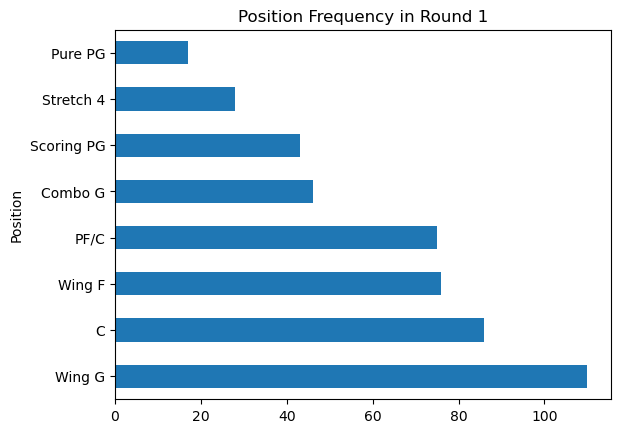

In [39]:
import matplotlib.pyplot as plt

data[data.Class==1].dropna().groupby(['Position'])['Class'].count().sort_values(ascending=False).plot(kind='barh')

plt.title('Position Frequency in Round 1')

plt.show()

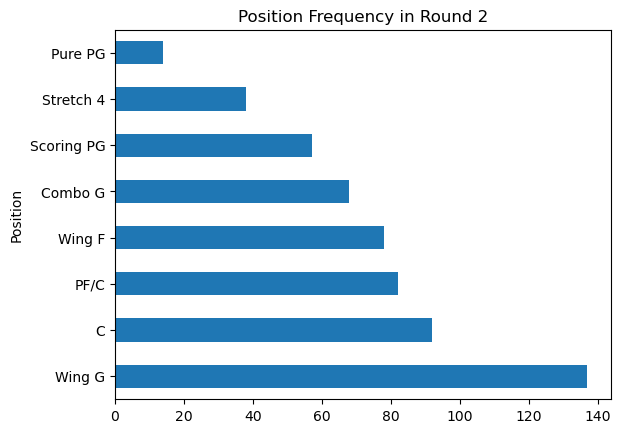

In [41]:
data[data.Class==0].dropna().groupby(['Position'])['Class'].count().sort_values(ascending=False).plot(kind='barh')

plt.title('Position Frequency in Round 2')

plt.show()